In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import fnmatch
import random as rn
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [4]:
#dl libraraies
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [5]:
from tqdm import notebook 
from tqdm.notebook import tqdm as tqdm
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_style('darkgrid')

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [6]:
Z=[]
IMG_SIZE=300
batik_bali_DIR='./assets/batik-bali'
batik_betawi_DIR='./assets/batik-betawi'
batik_cendrawasih_DIR='./assets/batik-cendrawasih'
batik_lasem_DIR='./assets/batik-lasem'
batik_pekalongan_DIR='./assets/batik-pekalongan'

In [7]:
def assign_label(img,batik_type):
    return batik_type

In [8]:
X=[]
def make_train_data(batik_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        if fnmatch.fnmatch(img, '*.jpg'):
#             print('gambar', img)
            label=assign_label(img,batik_type)
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
#             img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))

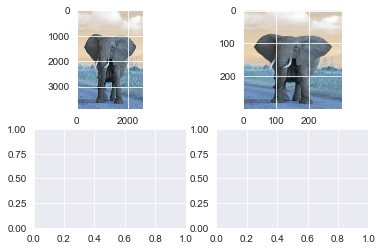

In [15]:
fig,ax=plt.subplots(2,2)
window_name = 'image'
img = cv2.imread('./elephant.jpg',cv2.IMREAD_COLOR)
ax[0,0].imshow(img)

img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
ax[0,1].imshow(img)
# cv2.imshow(window_name, img)



In [9]:
make_train_data('Batik Bali',batik_bali_DIR)
print(len(X))

  0%|          | 0/50 [00:00<?, ?it/s]

50


In [10]:
make_train_data('Batik Betawi',batik_betawi_DIR)
print(len(X))

  0%|          | 0/50 [00:00<?, ?it/s]

100


In [11]:
make_train_data('Batik Cendrawasih',batik_cendrawasih_DIR)
print(len(X))

  0%|          | 0/50 [00:00<?, ?it/s]

150


In [12]:
make_train_data('Batik Lasem',batik_lasem_DIR)
print(len(X))

  0%|          | 0/50 [00:00<?, ?it/s]

200


In [13]:
make_train_data('Batik Pekalongan',batik_pekalongan_DIR)
print(len(X))

  0%|          | 0/50 [00:00<?, ?it/s]

250


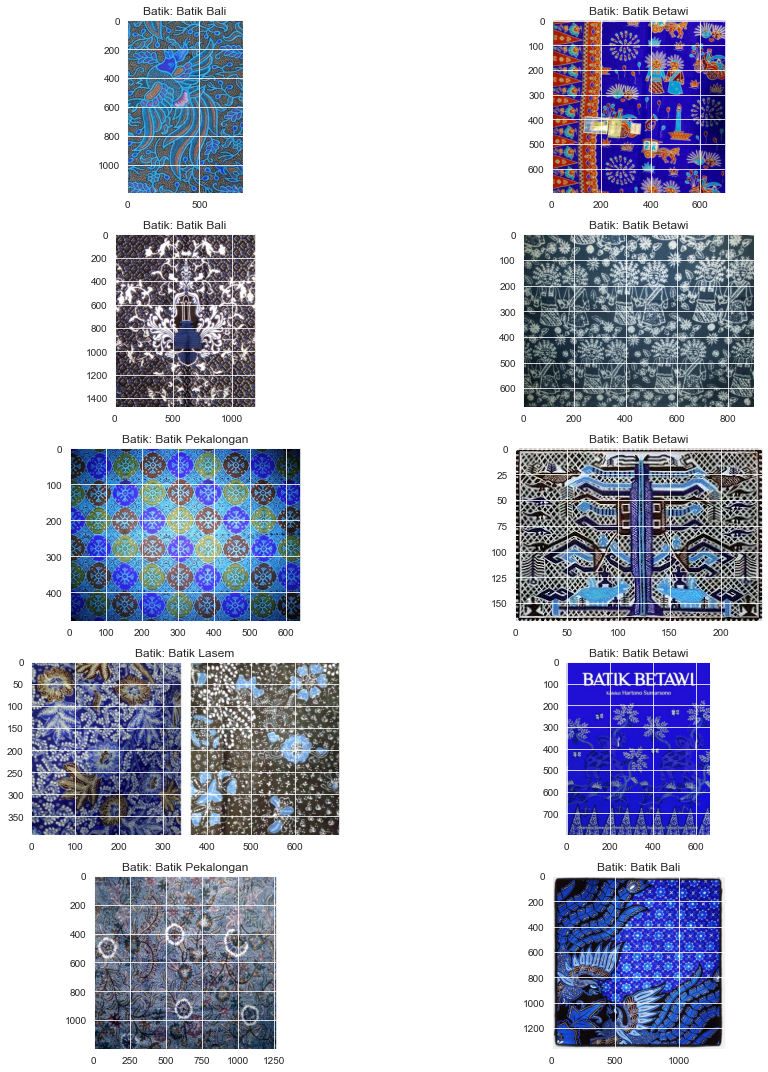

In [63]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)

# print(X[0])

for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Batik: '+Z[l])
        
plt.tight_layout()

In [39]:
le=LabelEncoder()
Y=le.fit_transform(Z)

print(Z)
Y=to_categorical(Y,5)  #from keras.utils import to_categorical

X=np.array(X)
# X=X/255

['Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Bali', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Betawi', 'Batik Beta

In [15]:
# print(len(X), len(Y))
# print(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

print((y_train))

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0.

In [21]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [193]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [199]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [195]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [197]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [198]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 96)      

In [53]:
a = X[0]
b = a/255

# ax[0,0].imshow(a)
# print((b))

#Be prepared to wait 

In [200]:
History = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 25.4875 - accuracy: 0.2203 - val_loss: 197.2686 - val_accuracy: 0.2381
Epoch 2/50
1/1 [==============================] - 4s 4s/step - loss: 125.0356 - accuracy: 0.2542 - val_loss: 236.5074 - val_accuracy: 0.2063
Epoch 3/50
1/1 [==============================] - 4s 4s/step - loss: 171.4950 - accuracy: 0.2373 - val_loss: 130.4512 - val_accuracy: 0.1270
Epoch 4/50
1/1 [==============================] - 5s 5s/step - loss: 118.4320 - accuracy: 0.2034 - val_loss: 53.5250 - val_accuracy: 0.2222
Epoch 5/50
1/1 [==============================] - 16s 16s/step - loss: 42.4569 - accuracy: 0.2266 - val_loss: 18.3467 - val_accuracy: 0.2222
Epoch 6/50
1/1 [==============================] - 5s 5s/step - loss: 15.6790 - accuracy: 0.1695 - val_loss: 6.2493 - val_accuracy: 0.1270
Epoch 7/50
1/1 [==============================] - 5s 5s/step - loss: 4.8311 - accuracy: 0.2712 - val_loss: 2.9012 - val_accuracy: 0.1270
Epoch 8/50
1/1 [======

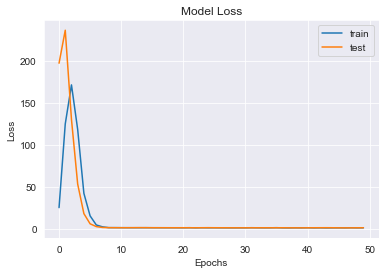

In [204]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

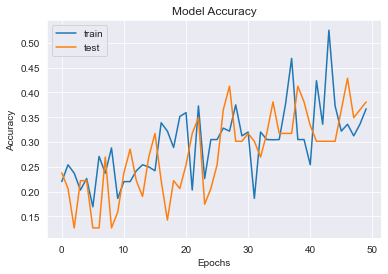

In [205]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model = load_model('mymodel.keras')
# model.save('mymodel.keras')
print(type(x_test))
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)
y_test_digits=np.argmax(y_test,axis=1)

print(y_test_digits)

In [273]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==len(y_test)):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==len(y_test)):
        break
        
print((prop_class))

[2, 8, 13, 14, 17, 19, 21, 22, 23, 25, 26, 28, 31, 34, 36, 40, 41, 42, 49, 53, 55, 56, 60, 62]


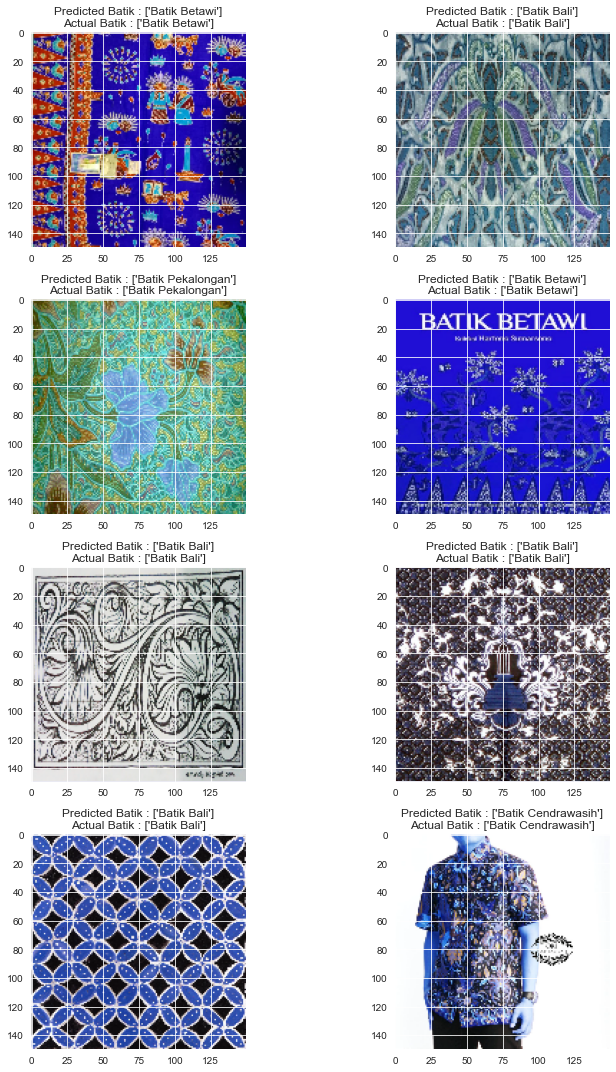

In [280]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

path = './'
test_img = cv2.imread(path, cv2.IMREAD_COLOR)


# print(prop_class[0])
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Batik : "
                          +str(le.inverse_transform([pred_digits[prop_class[count]]]))
                          +"\n"+"Actual Batik : "
                          +str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1
        

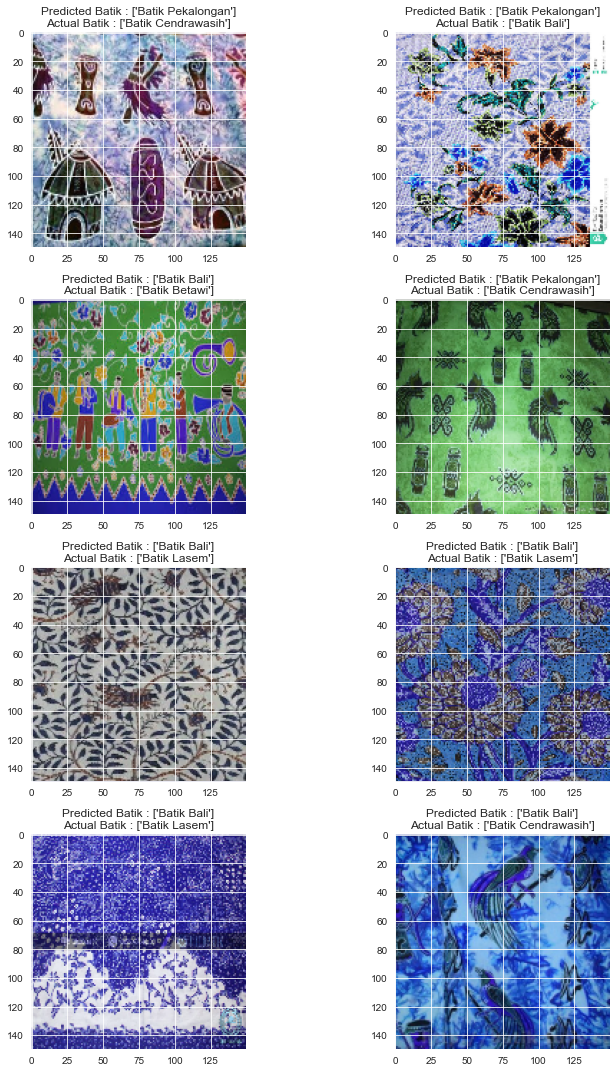

In [228]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Batik : "
                          +str(le.inverse_transform([pred_digits[mis_class[count]]]))
                          +"\n"+"Actual Batik : "
                          +str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

In [38]:
tf.saved_model.save(model, './')

INFO:tensorflow:Assets written to: ./assets


INFO:tensorflow:Assets written to: ./assets


In [39]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('./') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [40]:
#https://vittoriomazzia.com/tflite-tfrt-conversion-summary/
# save model
#tflite_model_file = pathlib.Path('/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/')
#tflite_model_file.write_bytes(tflite_model)

In [283]:
#Code by Olga Belitskaya https://www.kaggle.com/olgabelitskaya/sequential-data/comments
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#eb3434','#eb3446','Akronim','Smokum',30,15
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h1>"""%string))
    
    
dhtml("That\'s it thank you!")